In [1]:
import numpy as np

def compute_nrmse(gt, test):
    """
    gt: ground truth 배열
    test: 예측 또는 비교할 배열
    """
    if gt.shape != test.shape:
        raise ValueError("입력 배열의 크기가 서로 달라요.")

    mse_val = np.mean((gt - test) ** 2)
    norm_factor = np.max(gt) - np.min(gt)

    if norm_factor == 0:
        print("경고: 정규화 기준이 0입니다. NRMSE 계산 불가")
        return np.nan

    return np.sqrt(mse_val) / norm_factor


In [59]:
import scipy.io as sio
import numpy as np

ref_mat = sio.loadmat('mat/outParamsRef_Axial_Liver_3T_12echo.mat', struct_as_record=False, squeeze_me=True)
ref_struct = ref_mat['outParamsRef']

ref_wat_mag = np.abs(ref_struct.species[0].amps) / 1e3
ref_fat_mag = np.abs(ref_struct.species[1].amps) / 1e3
ref_frq     = np.abs(ref_struct.fieldmap) 
ref_r2      = np.abs(ref_struct.r2starmap) /1e3

con_mat = sio.loadmat('mat/outParams_Axial_Liver_3T_multicoil_6echo.mat', struct_as_record=False, squeeze_me=True)
con_struct = con_mat['outParams']

con_wat_mag = np.abs(con_struct.species[0].amps) / 1e3
con_fat_mag = np.abs(con_struct.species[1].amps) / 1e3
con_frq     = np.abs(con_struct.fieldmap) 
con_r2      = np.abs(con_struct.r2starmap) / 1e3

ntd_mat = sio.loadmat('res/NTD_v1.mat')
ntd_wat_mag = np.squeeze(ntd_mat['wat_mag'][2, :, :]).astype(float)
ntd_fat_mag = np.squeeze(ntd_mat['fat_mag'][2, :, :]).astype(float)
ntd_frq     = np.squeeze(ntd_mat['frq'][2, :, :]).astype(float) 
ntd_r2      = np.squeeze(ntd_mat['r2'][2, :, :]).astype(float) / 1e3

dip_mat = sio.loadmat('res/DIP_TV.mat')
dip_wat_mag = np.squeeze(dip_mat['wat_mag'][2, :, :]).astype(float)
dip_fat_mag = np.squeeze(dip_mat['fat_mag'][2, :, :]).astype(float)
dip_frq     = np.squeeze(dip_mat['frq'][2, :, :]).astype(float) 
dip_r2      = np.squeeze(dip_mat['r2'][2, :, :]).astype(float) / 1e3

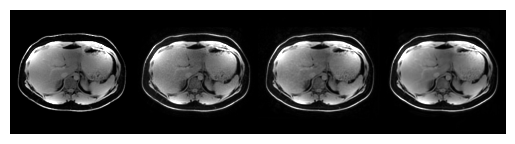

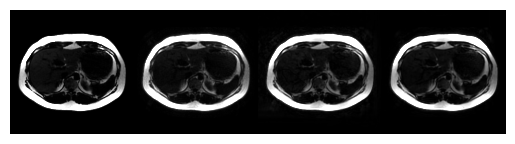

In [3]:
import matplotlib.pyplot as plt

wat_cat = np.concatenate((ref_wat_mag, con_wat_mag, ntd_wat_mag, dip_wat_mag), axis=1)
plt.figure()
plt.imshow(wat_cat, vmin=0, vmax=0.7, cmap='gray')
plt.axis('off')
plt.show()

fat_cat = np.concatenate((ref_fat_mag, con_fat_mag, ntd_fat_mag, dip_fat_mag), axis=1)
plt.figure()
plt.imshow(fat_cat, vmin=0, vmax=0.7, cmap='gray')
plt.axis('off')
plt.show()


In [4]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

con_wat_NRMSE = compute_nrmse(ref_wat_mag, con_wat_mag)
ntd_wat_NRMSE = compute_nrmse(ref_wat_mag, ntd_wat_mag)
dip_wat_NRMSE = compute_nrmse(ref_wat_mag, dip_wat_mag)

con_fat_NRMSE = compute_nrmse(con_fat_mag, con_fat_mag)
ntd_fat_NRMSE = compute_nrmse(ref_fat_mag, ntd_fat_mag)
dip_fat_NRMSE = compute_nrmse(ref_fat_mag, dip_fat_mag)

range_wat = ref_wat_mag.max() - ref_wat_mag.min()
range_fat = ref_fat_mag.max() - ref_fat_mag.min()

con_wat_ssim = ssim(ref_wat_mag, con_wat_mag, data_range=range_wat)
ntd_wat_ssim = ssim(ref_wat_mag, ntd_wat_mag, data_range=range_wat)
dip_wat_ssim = ssim(ref_wat_mag, dip_wat_mag, data_range=range_wat)

con_fat_ssim = ssim(ref_fat_mag, con_fat_mag, data_range=range_fat)
ntd_fat_ssim = ssim(ref_fat_mag, ntd_fat_mag, data_range=range_fat)
dip_fat_ssim = ssim(ref_fat_mag, dip_fat_mag, data_range=range_fat)

con_wat_psnr = psnr(ref_wat_mag, con_wat_mag, data_range=range_wat)
ntd_wat_psnr = psnr(ref_wat_mag, ntd_wat_mag, data_range=range_wat)
dip_wat_psnr = psnr(ref_wat_mag, dip_wat_mag, data_range=range_wat)

con_fat_psnr = psnr(ref_fat_mag, con_fat_mag, data_range=range_fat)
ntd_fat_psnr = psnr(ref_fat_mag, ntd_fat_mag, data_range=range_fat)
dip_fat_psnr = psnr(ref_fat_mag, dip_fat_mag, data_range=range_fat)

print(f"IDEAL NRMSE: wat={con_wat_NRMSE:.4f}, fat={con_fat_NRMSE:.4f}")
print(f"NTD NRMSE: wat={ntd_wat_NRMSE:.4f}, fat={ntd_fat_NRMSE:.4f}")
print(f"DIP NRMSE: wat={dip_wat_NRMSE:.4f}, fat={dip_fat_NRMSE:.4f}")

print(f"IDEAL SSIM: wat={con_wat_ssim:.4f}, fat={con_fat_ssim:.4f}")
print(f"NTD SSIM: wat={ntd_wat_ssim:.4f}, fat={ntd_fat_ssim:.4f}")
print(f"DIP SSIM: wat={dip_wat_ssim:.4f}, fat={dip_fat_ssim:.4f}")

print(f"IDEAL PSNR: wat={con_wat_psnr:.4f}, fat={con_fat_psnr:.4f}")
print(f"NTD PSNR: wat={ntd_wat_psnr:.4f}, fat={ntd_fat_psnr:.4f}")
print(f"DIP PSNR: wat={dip_wat_psnr:.4f}, fat={dip_fat_psnr:.4f}")


IDEAL NRMSE: wat=0.0254, fat=0.0000
NTD NRMSE: wat=0.0265, fat=0.0274
DIP NRMSE: wat=0.0276, fat=0.0262
IDEAL SSIM: wat=0.9098, fat=0.9147
NTD SSIM: wat=0.8799, fat=0.8676
DIP SSIM: wat=0.9025, fat=0.9240
IDEAL PSNR: wat=31.9157, fat=32.9873
NTD PSNR: wat=31.5243, fat=31.2538
DIP PSNR: wat=31.1808, fat=31.6331


In [5]:
def PDFF(w, f):
    return np.abs(f) / (np.abs(w) + np.abs(f))

In [6]:
PDFF_ref = PDFF(ref_wat_mag, ref_fat_mag)
PDFF_con = PDFF(con_wat_mag, con_fat_mag)
PDFF_NTD = PDFF(ntd_wat_mag, ntd_fat_mag)
PDFF_DIP = PDFF(dip_wat_mag, dip_fat_mag)

PDFF_ref[np.isnan(PDFF_ref)] = 0
PDFF_con[np.isnan(PDFF_con)] = 0
PDFF_NTD[np.isnan(PDFF_NTD)] = 0
PDFF_DIP[np.isnan(PDFF_DIP)] = 0

/tmp/ipykernel_2572230/3014486602.py:2: RuntimeWarning: invalid value encountered in divide
  return np.abs(f) / (np.abs(w) + np.abs(f))


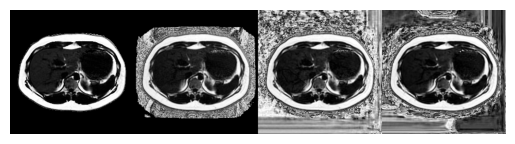

In [7]:
PDFF_cat = np.concatenate((PDFF_ref, PDFF_con, PDFF_NTD, PDFF_DIP), axis=1)

plt.figure()
plt.imshow(PDFF_cat, vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()

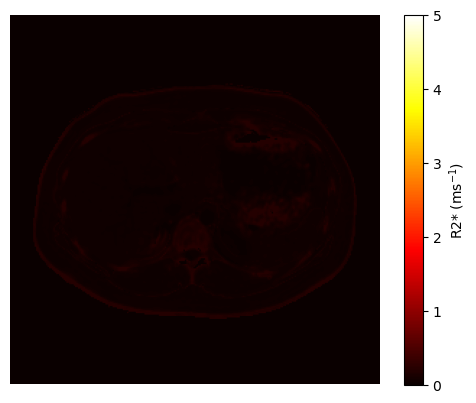

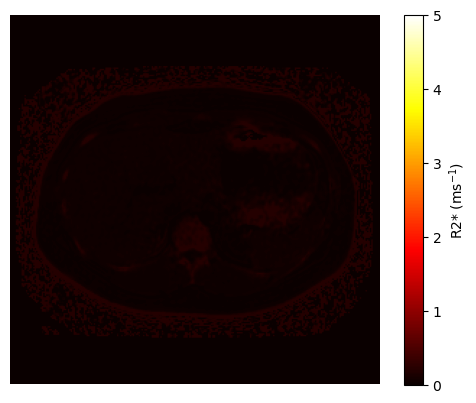

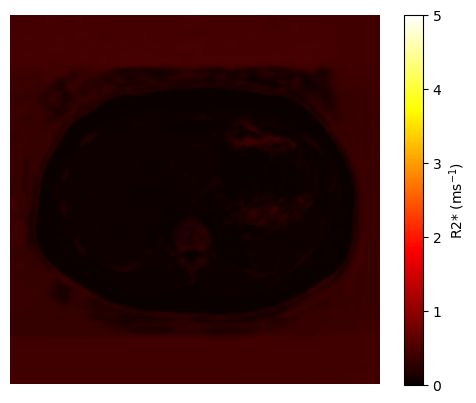

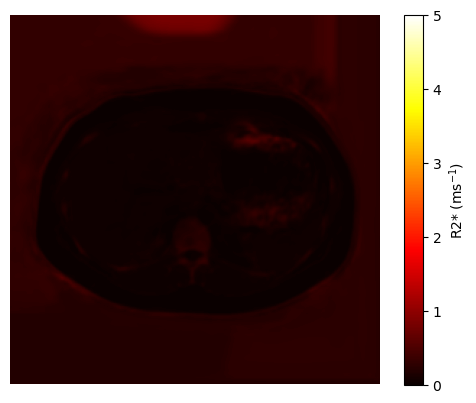

In [60]:
plt.figure()
im = plt.imshow(ref_r2, vmin=0, vmax=5, cmap='hot')
plt.colorbar(im, label="R2* (ms$^{-1}$)")  
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(con_r2, vmin=0, vmax=5, cmap='hot')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(ntd_r2, vmin=0, vmax=5, cmap='hot')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(dip_r2, vmin=0, vmax=5, cmap='hot')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()


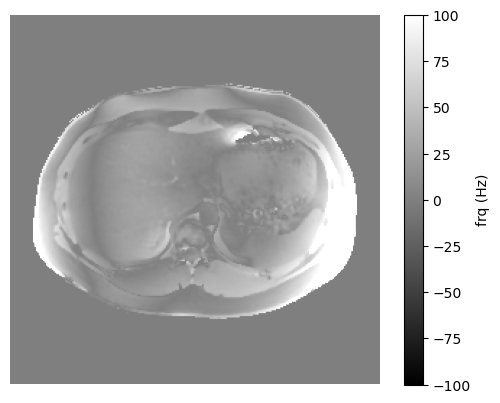

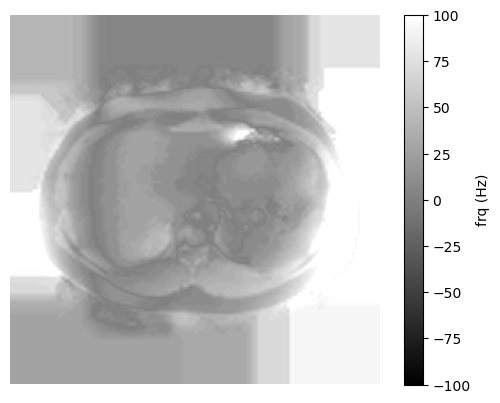

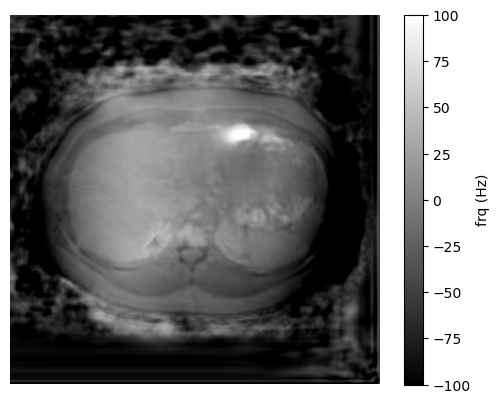

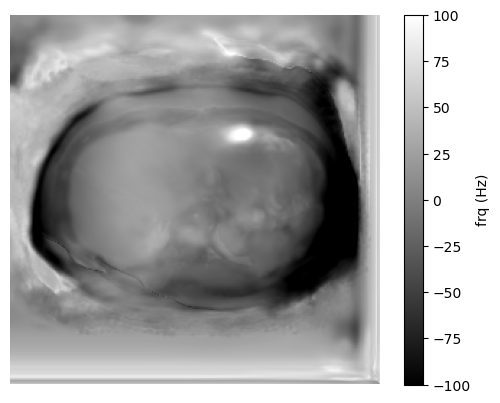

In [61]:
plt.figure()
im = plt.imshow(ref_frq, vmin=-100, vmax=100, cmap='gray')
plt.colorbar(im, label="frq (Hz)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(con_frq, vmin=-100, vmax=100, cmap='gray')
plt.colorbar(im, label="frq (Hz)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(ntd_frq, vmin=-100, vmax=100, cmap='gray')
plt.colorbar(im, label="frq (Hz)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(dip_frq, vmin=-100, vmax=100, cmap='gray')
plt.colorbar(im, label="frq (Hz)")
plt.axis('off')
plt.show()

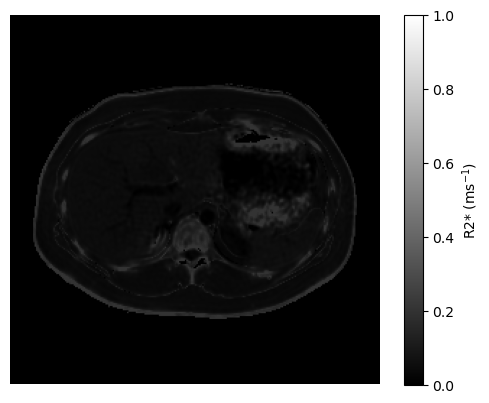

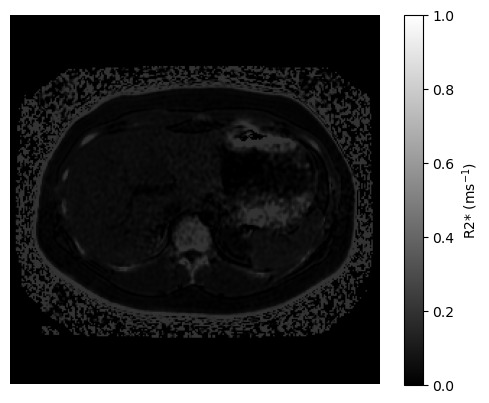

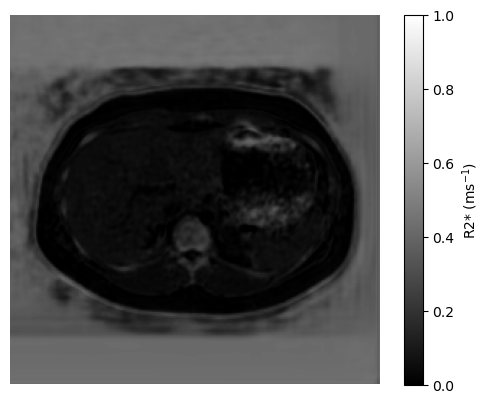

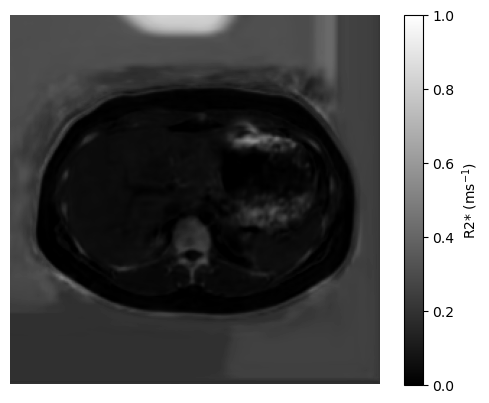

In [31]:
plt.figure()
im = plt.imshow(ref_r2, vmin=0, vmax=1, cmap='gray')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(con_r2, vmin=0, vmax=1, cmap='gray')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(ntd_r2, vmin=0, vmax=1, cmap='gray')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()

plt.figure()
im = plt.imshow(dip_r2, vmin=0, vmax=1, cmap='gray')
plt.colorbar(im, label="R2* (ms$^{-1}$)")
plt.axis('off')
plt.show()

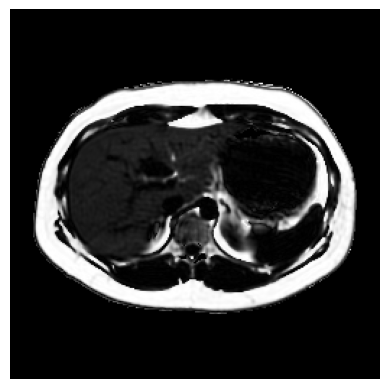

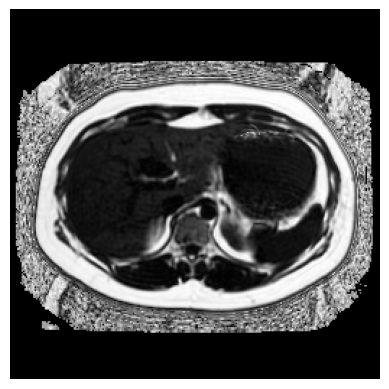

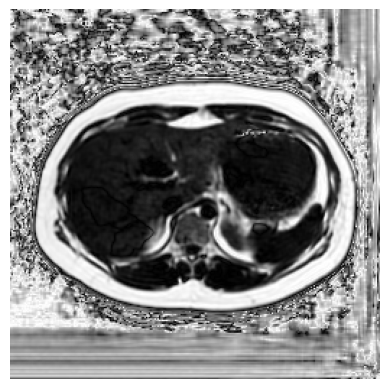

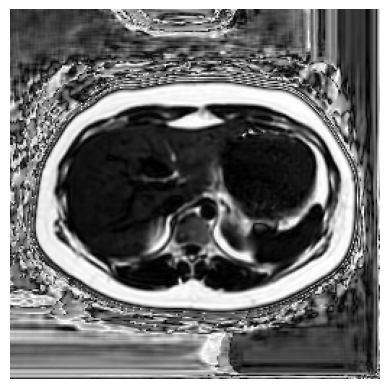

In [8]:
plt.figure()
plt.imshow(PDFF_ref, vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(PDFF_con, vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(PDFF_NTD, vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(PDFF_DIP, vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()

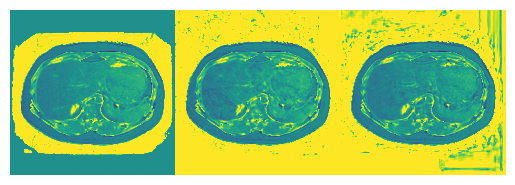

In [15]:
PDFF_diff = np.concatenate((PDFF_con - PDFF_ref, PDFF_NTD - PDFF_ref, PDFF_DIP - PDFF_ref), axis=1)

plt.figure()
plt.imshow(PDFF_diff, vmin=-0.25, vmax=0.25, cmap='viridis')  
plt.axis('off')
plt.show()

In [16]:
box_size = (5, 5)

# 5x5 grid (25 points)
points = np.array([[120 + 7 * ii, 55 + 7 * jj] for ii in range(5) for jj in range(5)])

# hard coding
extra_points = np.array([
    [113, 74],
    [55, 123],
    [100, 60],
    [194, 122],
    [109, 98],
    [131, 66],
    [153, 58],
    [126, 97],
])
points = np.vstack((points, extra_points))  # shape (33, 2)

In [17]:
lp = points.shape[0]
PDFF_roi_ref = np.zeros(lp)
PDFF_roi_con = np.zeros(lp)
PDFF_roi_ntd = np.zeros(lp)
PDFF_roi_dip = np.zeros(lp)

for i in range(lp):
    x, y = points[i]  # [row, col] = [x, y]
    
    PDFF_roi_ref[i] = np.mean(PDFF_ref[x:x + box_size[0], y:y + box_size[1]])
    PDFF_roi_con[i] = np.mean(PDFF_con[x:x + box_size[0], y:y + box_size[1]])
    PDFF_roi_ntd[i] = np.mean(PDFF_NTD[x:x + box_size[0], y:y + box_size[1]])
    PDFF_roi_dip[i] = np.mean(PDFF_DIP[x:x + box_size[0], y:y + box_size[1]])

In [18]:
from sklearn.linear_model import LinearRegression


def plot_fit(xval, yval, title='Linear Fit of PDFF'):
    xval = np.array(xval).reshape(-1, 1)
    yval = np.array(yval)

    model = LinearRegression().fit(xval, yval)
    yfit = model.predict(xval)
    R2 = model.score(xval, yval)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(xval, yval, color='royalblue', s=60, alpha=0.8, label='Data Points', edgecolors='k')
    plt.plot(xval, yfit, color='crimson', linewidth=2.5, label='Fitted Line')

    # Annotation box
    eq_str = f'$R^2$ = {R2:.4f}\ny = {model.coef_[0]:.3f}x + {model.intercept_:.3f}'
    bbox_props = dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray", alpha=0.9)
    xpos = xval.min() + (xval.max() - xval.min()) * 0.05
    ypos = yval.max() - (yval.max() - yval.min()) * 0.1
    plt.text(xpos, ypos, eq_str, fontsize=12, bbox=bbox_props, color='black')

    # Axes
    plt.xlabel("Reference PDFF", fontsize=12)
    plt.ylabel("Predicted PDFF", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

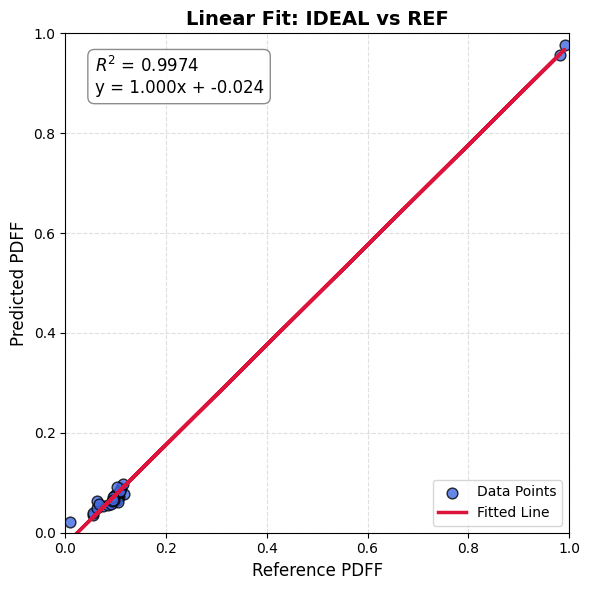

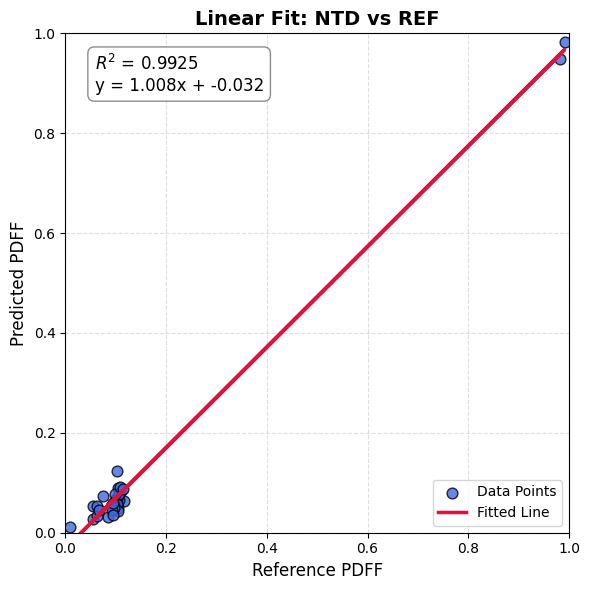

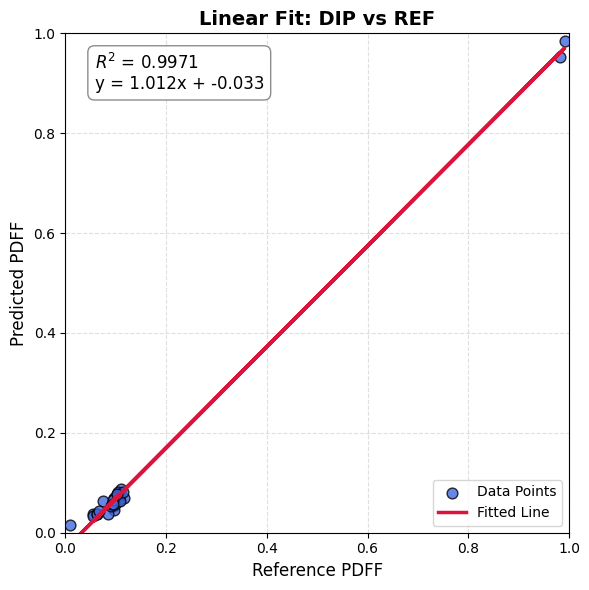

In [ ]:
plot_fit(PDFF_roi_ref, PDFF_roi_con, title="Linear Fit: IDEAL vs REF")
plot_fit(PDFF_roi_ref, PDFF_roi_ntd, title="Linear Fit: NTD vs REF")
plot_fit(PDFF_roi_ref, PDFF_roi_dip, title="Linear Fit: PRO vs REF")

In [20]:
def baplot(my_vals, ref_vals, axis_range=None, title='Bland-Altman Plot'):
    means = (my_vals + ref_vals) / 2
    diffs = my_vals - ref_vals

    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs)
    loa_upper = mean_diff + 1.96 * std_diff
    loa_lower = mean_diff - 1.96 * std_diff

    plt.figure(figsize=(6, 5))
    plt.scatter(means, diffs, color='royalblue', edgecolor='k', s=60, alpha=0.8, label='Data Points')

    # 기준선 그리기
    plt.axhline(mean_diff, color='black', linestyle='--', linewidth=2, label='Mean Diff')
    plt.axhline(loa_upper, color='red', linestyle='--', linewidth=2, label='+1.96 SD')
    plt.axhline(loa_lower, color='red', linestyle='--', linewidth=2, label='-1.96 SD')

    # 텍스트 표시
    plt.text(means.min(), loa_upper + 0.2, f'+1.96 SD = {loa_upper:.2f}', color='red', fontsize=10)
    plt.text(means.min(), mean_diff + 0.2, f'Mean Diff = {mean_diff:.2f}', color='black', fontsize=10)
    plt.text(means.min(), loa_lower + 0.2, f'-1.96 SD = {loa_lower:.2f}', color='red', fontsize=10)

    # 축 및 기타 설정
    plt.xlabel('Mean of My Value and Reference', fontsize=12)
    plt.ylabel('Difference (My - Reference)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()

    if axis_range:
        plt.axis(axis_range)

    plt.tight_layout()
    plt.show()


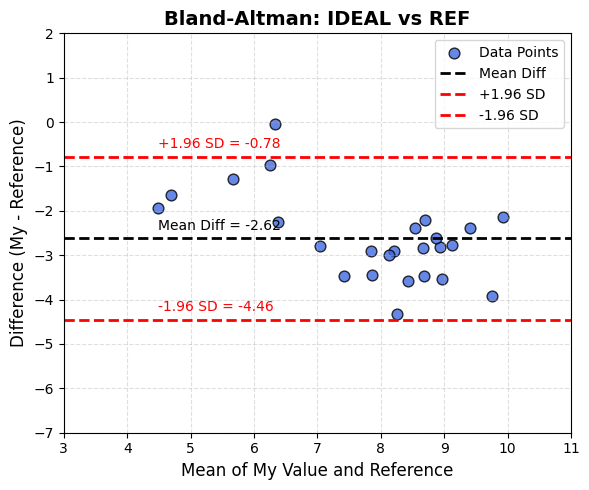

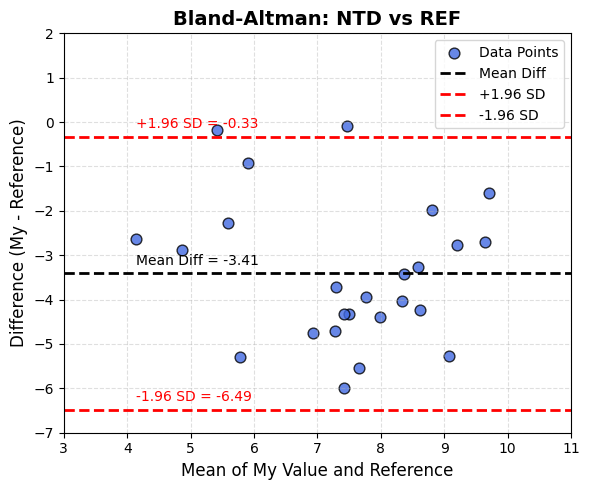

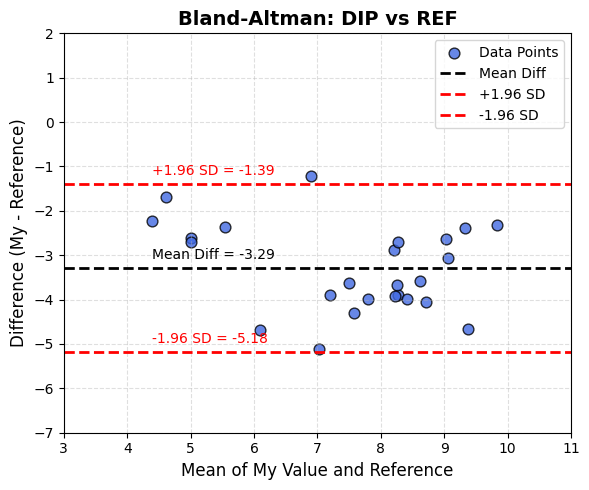

In [ ]:
baplot(100 * PDFF_roi_con[:25], 100 * PDFF_roi_ref[:25], axis_range=[3, 11, -7, 2], title='Bland-Altman: IDEAL vs REF')
baplot(100 * PDFF_roi_ntd[:25], 100 * PDFF_roi_ref[:25], axis_range=[3, 11, -7, 2], title='Bland-Altman: NTD vs REF')
baplot(100 * PDFF_roi_dip[:25], 100 * PDFF_roi_ref[:25], axis_range=[3, 11, -7, 2], title='Bland-Altman: PRO vs REF')

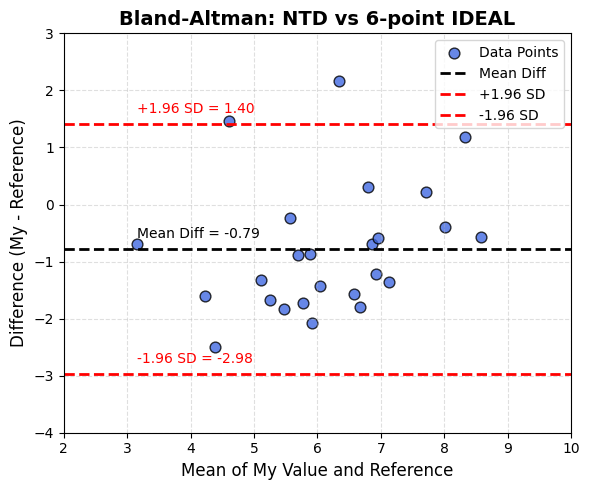

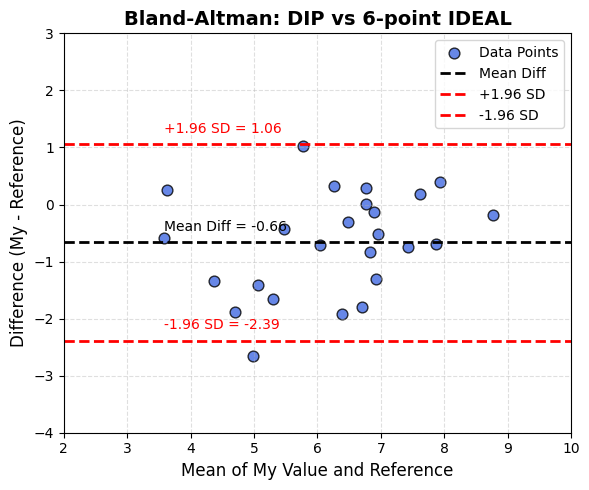

In [29]:
baplot(100 * PDFF_roi_ntd[:25], 100 * PDFF_roi_con[:25], axis_range=[2, 10, -4, 3], title='Bland-Altman: NTD vs 6-point IDEAL')
baplot(100 * PDFF_roi_dip[:25], 100 * PDFF_roi_con[:25], axis_range=[2, 10, -4, 3], title='Bland-Altman: DIP vs 6-point IDEAL')